In [3]:
import tellurium as te

In [4]:
model_string = '''
// Equations
J1: D -> E; dE*D;
J2: E -> D; dE*E;
J3: E -> Ev; bE*V*E;
J4: Ev -> E; aE*Ev;
J5: Ev -> D; dE*Ev;

//J6: Ev -> D; kE*g*Ev*Tc;

J6: Ev -> D; drt * g * Tc * Ev / (1000 + Ev + g * Tc);

//J6: Ev -> D; drt * g * Tc * Ev /( Kev + Ev);

J7: -> V; pV*Ev;
J8: V ->; cV*V; # v0 -> v1; v1 =cV*v0

J9: -> Da; bD*V*(D0-Da);
J10: Da ->; dD*Da;

// bellow is lymph

J11: -> Dm; kD*Da;
J12: Dm ->; dDm*Dm;
J13: -> Tc; dC*Tc0;
J14: Tc ->; dC*Tc;
//# J15: Dm -> Tc; rT1*Dm*Tc/(Dm+pT2) + Dm; 
J15:  -> Tc; rT1*Dm*Tc/(Dm+pT2); 
//J16: Tc ->; dT1*Tc*Ev/(Ev+dT2);
J16: Tc ->; dT1*Tc*Dm/(Dm+dT2);

J17: -> Th1; sTh1*Th1/(1+Th2)^2;
//J18: Dm -> Th1; pTh1*Dm*(Th1^2)/(1+Th2)^2 + Dm;
J18:  -> Th1; pTh1*Dm*(Th1^2)/(1+Th2)^2;
J19: Th1 ->; dTh1*Dm*(Th1^3)/(1+Th2);
J20: Th1 ->; mTh*Th1;
J21: -> Th2; sTh2*Th2/(1+Th2);
# J22: Dm -> Th2; pTh2*(r+Th1)*Dm*(Th2^2)/((1+Th2)*(1+Th1+Th2)) + Dm
J22:  -> Th2; pTh2*(r+Th1)*Dm*(Th2^2)/((1+Th2)*(1+Th1+Th2)) 
J23: Th2 ->; mTh*Th2;

// new eqs

J24: -> B; dB*B0;
J25: B ->; dB*B;
//J26: Dm + Th2 -> B; rB1*B*(Dm+h*Th2)/(Dm+h*Th2+rB2);
J26:  -> B; rB1*B*(Dm+h*Th2)/(Dm+h*Th2+rB2);

J27: B -> Pss; pS*B;
J28: B -> Psn; pS*B;
J29: B -> Pls; pL*B*Th2;
J30: B -> Pln; pL*B*Th2;
J31: Pss ->; dS*Pss;
J32: Psn ->; dS*Psn;
J33: Pls ->; dL*Pls;
J34: Pln ->; dL*Pln;
J35: Pss -> Pls; d*(1-v)*Pss;
J36: Psn -> Pln; d*(1-v)*Psn;
J37:  -> Pss; b*v*Pss;
J37a:  -> Pls; b*v*Pls;
J38:  -> Psn; b*v*Psn;
J38a:  -> Pln; b*v*Pln;
J39: Pls -> Pss; d*(1-v)*Pls;
J40: Pln -> Psn; d*(1-v)*Pln; 

J41:  -> sIgM; pAS*Pss;
J42:  -> nIgM; pAS*Psn;
J43:  -> sIgG; pAS*Pls;
J44:  -> nIgG; pAS*Pln;
J45: sIgM ->; dM*sIgM;
J46: sIgG ->; dG*sIgG;
J47: nIgM ->; dM*nIgM;
J48: nIgG ->; dG*nIgG; 
// feed back to tissue
J49: Ev + nIgM -> D; eE*Ev*nIgM; // reevaluate these set (49-52) due to anti-bodies being consumed 
J50: Ev + nIgG -> D; eE*Ev*nIgG;
//J51: V  ->; eV*V*sIgM; # v1->v2; v2= sIgM * eV * v1 = sIgM * eV *cV *  v0
J51: V + sIgM ->; eV*V*sIgM;
//J52: V  ->; eV*V*sIgG;
J52: V + sIgG ->; eV*V*sIgG;


// Parameters
dE=10^-3;
E0=5*10^5;
bE=3*10^-6;
aE=5.0*10^-2;
V0=10;
pV=19;
cV=1;
kE=1.19*10^-3 / 900; // 900 rescaling for non-0 T cell pop in tissue
g=0.15 * 900;

drt = 30;
Kev = Tc0;

tC=0.5;// not included in the model
eE=0.05;
eV=16;
D0=10^3;
bD=10^-2;
dD=2.9;
kD=0.5;
tD=1;// not included in the model
dDm=0.5;
dC=10.1*10^-3;
Tc0=5*10^2;
rT1=1.3;
rT2=1;
dT1=5.0;
dT2=2000;
sTh1=2.5;
pTh1=4;
dTh1=0.03;
mTh=0.25;
sTh2=0.001;
pTh2=0.0012;
r=0.2;
dB=0.0009;
B0=1*10^3;
rB1=100;
rB2=2*10^5;
h=100;
pS=10^-1;
pL=8*10^-3;
dS=0.002;
dL=0.02;
b=2.4*10^-4;
d=2.4*10^-2;
pAS=0.2;
pAL=0.3;
dG=0.04;
dM=0.2;
pT2=600;
v = 0.5
// Initial Conditions
E = E0;
V = 10;
Th1=10;
Th2=10;
'''

In [5]:
rr = te.loadAntimonyModel(model_string)
#n=rr.simulate(0,20,4000,['time','I1','I2','I2D1','I2D2','I2D3','I2D4','I2D5','I2D'])
#n=rr.simulate(0,20,10000,['time','TE','I1','I2','V','Cyto','LymphCyto','LymphE','E'])
#n=rr.simulate(0,20,4000,['time','I1','I2','E','EM','V','I2D'])

#rr.plot(n,logy=True, ylim=[1, 5E7])


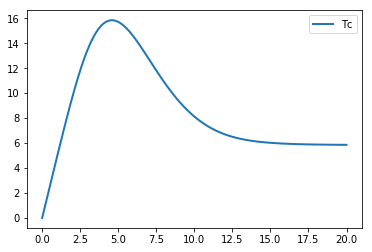

In [6]:
rr.resetAll()
n = rr.simulate(0,20,4000,['time','Tc'])
rr.plot()

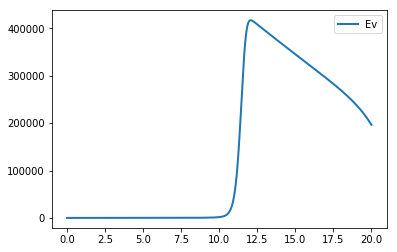

In [7]:
rr.resetAll()
n = rr.simulate(0,20,4000,['time','Ev'])
rr.plot()

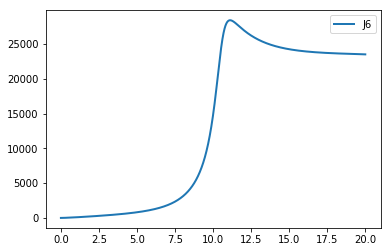

In [8]:
rr.resetAll()
#rr.simulate(0,2,4000)
#n = rr.simulate(0,20,4000,['time','Tc', 'Ev'])
n = rr.simulate(0,20,4000,['time','J6'])
rr.plot()
